<a href="https://colab.research.google.com/github/rmhanna/Randa/blob/main/Student_Grade_Cleaning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 3.2: Practice with Data Cleaning*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week%203/Notebook3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

Exercise I. Load the following datafile from GitHub

In [ ]:
grads = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%203/grads.csv")

In [ ]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,NaN,$40k
6,Estelle,100,3.2,Festivus Uni,1.7,$0k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,NaN,$75k


In [ ]:


# Display the first few rows
print(grads.head())
print(grads.tail())
print("\n The maximum GPA:", grads["GPA"].max())
print("\n The minimum GPA:", grads["GPA"].min())
print("\n The average GPA:", grads["GPA"].mean())
print("\n The median GPA:", grads["GPA"].median())

  Student Name  Avg Hours Studies per Week  GPA    University  \
0       George                          20  NaN           NYU   
1        Jerry                          35  3.5      Columbia   
2       Elaine                          55  4.0      Columbia   
3        Cosmo                           5  2.0  City College   
4       Newman                          25  2.8  City College   

   Sense of Humour (0-5) Salary  
0                    3.0   $40k  
1                    5.0   $80k  
2                    4.2   $60k  
3                    2.0   $25k  
4                    0.0   $50k  
  Student Name  Avg Hours Studies per Week  GPA     University  \
4       Newman                          25  2.8   City College   
5        Frank                          35  3.0   Festivus Uni   
6      Estelle                         100  3.2  Festivus Uni    
7          Leo                          15  2.4   Festivus Uni   
8       Rachel                          50  4.0       Columbia   

   Sense

Question 1: Identify all the outliers in the above data.  Justify your answers using objective measures.


=== Outlier Detection using IQR ===

Column: Avg Hours Studies per Week
IQR bounds: -25.00 to 95.00
Student Name  Avg Hours Studies per Week
     Estelle                         100

Column: GPA
IQR bounds: 1.75 to 4.55
No outliers detected.

Column: Sense of Humour (0-5)
IQR bounds: -0.25 to 4.95
Student Name  Sense of Humour (0-5)
       Jerry                    5.0

Column: Salary
IQR bounds: 10000.00 to 90000.00
No outliers detected.


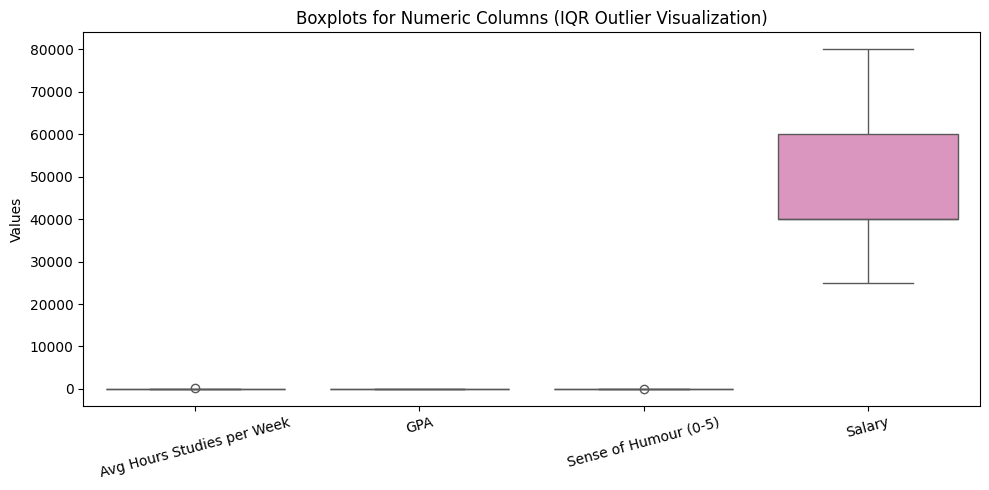

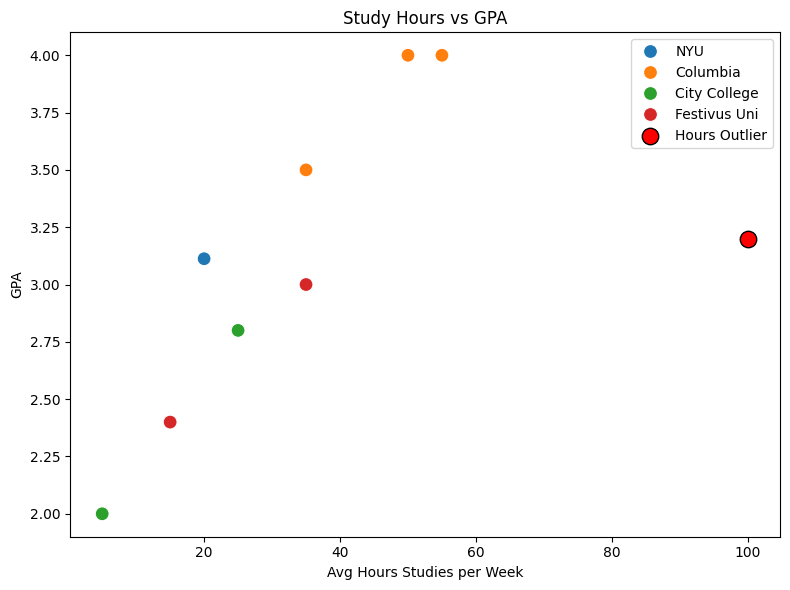

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load the dataset
url = "https://raw.githubusercontent.com/rmhanna/Randa/main/cleaned_grade.csv"
df = pd.read_csv(url)

# 2) Numeric columns
numeric_cols = ['Avg Hours Studies per Week', 'GPA', 'Sense of Humour (0-5)', 'Salary']

# 3) Outlier detection using IQR
print("\n=== Outlier Detection using IQR ===")
outliers_map = {}  # store outliers per column for optional highlighting

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_map[col] = outliers

    print(f"\nColumn: {col}")
    print(f"IQR bounds: {lower_bound:.2f} to {upper_bound:.2f}")
    if outliers.empty:
        print("No outliers detected.")
    else:
        print(outliers[['Student Name', col]].to_string(index=False))

# 4) Boxplots for numeric columns
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numeric_cols], palette='Set2')
plt.title('Boxplots for Numeric Columns (IQR Outlier Visualization)')
plt.ylabel('Values')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 5) Scatter plot: Study Hours vs GPA (with optional highlighting)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Avg Hours Studies per Week',
    y='GPA',
    data=df,
    hue='University' if 'University' in df.columns else None,
    s=100
)
plt.title('Study Hours vs GPA')
plt.xlabel('Avg Hours Studies per Week')
plt.ylabel('GPA')

# Highlight points that are outliers in "Avg Hours Studies per Week"
hrs_outliers = outliers_map['Avg Hours Studies per Week']
if not hrs_outliers.empty:
    plt.scatter(
        hrs_outliers['Avg Hours Studies per Week'],
        hrs_outliers['GPA'],
        s=140, color='red', edgecolor='black', label='Hours Outlier'
    )
    plt.legend(loc='best')

plt.tight_layout()
plt.show()


# New section

Question 2: There are various data that are missing.  Fill-in the missing data or delete the rows/columns that you think you should delete.  Justify your answer

In [6]:
import pandas as pd

# Load the dataset from GitHub raw link
url = "https://raw.githubusercontent.com/rmhanna/Randa/main/cleaned_grade.csv"
df = pd.read_csv(url)

# Step 1: Check missing values
print("Missing values per column:\n", df.isnull().sum())


for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            # Numeric column → fill with median
            df[col].fillna(df[col].median(), inplace=True)
        else:
            # Categorical column → fill with mode
            df[col].fillna(df[col].mode()[0], inplace=True)

# Step 3: Print cleaned DataFrame
print("\nCleaned DataFrame:\n", df)

Missing values per column:
 Student Name                  0
Avg Hours Studies per Week    0
GPA                           0
University                    0
Sense of Humour (0-5)         0
Salary                        0
dtype: int64

Cleaned DataFrame:
   Student Name  Avg Hours Studies per Week     GPA    University  \
0       George                          20  3.1125           NYU   
1        Jerry                          35  3.5000      Columbia   
2       Elaine                          55  4.0000      Columbia   
3        Cosmo                           5  2.0000  City College   
4       Newman                          25  2.8000  City College   
5        Frank                          35  3.0000  Festivus Uni   
6      Estelle                         100  3.2000  Festivus Uni   
7          Leo                          15  2.4000  Festivus Uni   
8       Rachel                          50  4.0000      Columbia   

   Sense of Humour (0-5)   Salary  
0               3.000000  400

Question 3: Reload the data and fill-in the data using mean method as well as the frequent method.

In [7]:
import pandas as pd

# Reload the dataset from GitHub raw link
url = "https://raw.githubusercontent.com/rmhanna/Randa/main/cleaned_grade.csv"
df = pd.read_csv(url)

# Step 1: Fill missing numeric values using mean method
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

# Step 2: Fill missing categorical values using frequent (mode) method
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Print the cleaned DataFrame
print(df)

  Student Name  Avg Hours Studies per Week     GPA    University  \
0       George                          20  3.1125           NYU   
1        Jerry                          35  3.5000      Columbia   
2       Elaine                          55  4.0000      Columbia   
3        Cosmo                           5  2.0000  City College   
4       Newman                          25  2.8000  City College   
5        Frank                          35  3.0000  Festivus Uni   
6      Estelle                         100  3.2000  Festivus Uni   
7          Leo                          15  2.4000  Festivus Uni   
8       Rachel                          50  4.0000      Columbia   

   Sense of Humour (0-5)   Salary  
0               3.000000  40000.0  
1               5.000000  80000.0  
2               4.200000  60000.0  
3               2.000000  25000.0  
4               0.000000  50000.0  
5               2.271429  40000.0  
6               1.700000  40000.0  
7               0.000000  35000

Exercise II. Run the cell below to create a new dataframe called `df_miss`.  Its first column will contain some missing values.

In [8]:
import pandas as pd
import numpy as np

# Parameters
nrows = 10
ncols = 5

# Set seed for reproducibility
np.random.seed(314)

# Create random data
data = np.random.rand(nrows, ncols)

# Create DataFrame
df_miss = pd.DataFrame(data, columns=['col_' + str(ii) for ii in range(ncols)])

# Randomly select indices for missing values
ix0 = np.random.randint(nrows, size=3)
ix1 = np.random.randint(nrows, size=3)

# Correct way to assign NaN using .loc
df_miss.loc[ix0, 'col_0'] = np.nan
df_miss.loc[ix1, 'col_1'] = np.nan

# Print the DataFrame
print(df_miss)

      col_0     col_1     col_2     col_3     col_4
0       NaN       NaN  0.265048  0.783205  0.918001
1  0.827355       NaN  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3       NaN       NaN  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5       NaN  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


Impute the missing values (NaN) in `col_0` (but not `col_1`) with the median.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [9]:
import pandas as pd

# Load the dataset from GitHub raw link
url = "https://raw.githubusercontent.com/rmhanna/Randa/main/cleaned_grade.csv"
df = pd.read_csv(url)

# Treat 'Avg Hours Studies per Week' as col_0
median_val = df['Avg Hours Studies per Week'].median()

# Correct way to impute NaN values in col_0 with median
df.loc[:, 'Avg Hours Studies per Week'] = df['Avg Hours Studies per Week'].fillna(median_val)

# Print the updated DataFrame
print(df)


  Student Name  Avg Hours Studies per Week     GPA    University  \
0       George                          20  3.1125           NYU   
1        Jerry                          35  3.5000      Columbia   
2       Elaine                          55  4.0000      Columbia   
3        Cosmo                           5  2.0000  City College   
4       Newman                          25  2.8000  City College   
5        Frank                          35  3.0000  Festivus Uni   
6      Estelle                         100  3.2000  Festivus Uni   
7          Leo                          15  2.4000  Festivus Uni   
8       Rachel                          50  4.0000      Columbia   

   Sense of Humour (0-5)   Salary  
0               3.000000  40000.0  
1               5.000000  80000.0  
2               4.200000  60000.0  
3               2.000000  25000.0  
4               0.000000  50000.0  
5               2.271429  40000.0  
6               1.700000  40000.0  
7               0.000000  35000

Impute the missing values in `col_1` with value 0.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [10]:
import pandas as pd

# Load the dataset from GitHub raw link
url = "https://raw.githubusercontent.com/rmhanna/Randa/main/cleaned_grade.csv"
df = pd.read_csv(url)

# Step 1: compute the median for col_0 ('Avg Hours Studies per Week')
median_col0 = df['Avg Hours Studies per Week'].median()

# Step 2: impute missing values using inplace=True at the DataFrame level
# - col_0 (Avg Hours Studies per Week) -> median
# - col_1 (GPA) -> 0
df.fillna(
    {
        'Avg Hours Studies per Week': median_col0,
        'GPA': 0
    },
    inplace=True
)

# Print the updated DataFrame
print(df)

  Student Name  Avg Hours Studies per Week     GPA    University  \
0       George                          20  3.1125           NYU   
1        Jerry                          35  3.5000      Columbia   
2       Elaine                          55  4.0000      Columbia   
3        Cosmo                           5  2.0000  City College   
4       Newman                          25  2.8000  City College   
5        Frank                          35  3.0000  Festivus Uni   
6      Estelle                         100  3.2000  Festivus Uni   
7          Leo                          15  2.4000  Festivus Uni   
8       Rachel                          50  4.0000      Columbia   

   Sense of Humour (0-5)   Salary  
0               3.000000  40000.0  
1               5.000000  80000.0  
2               4.200000  60000.0  
3               2.000000  25000.0  
4               0.000000  50000.0  
5               2.271429  40000.0  
6               1.700000  40000.0  
7               0.000000  35000

In [3]:
display(df.describe())

,Avg Hours Studies per Week,GPA,Sense of Humour (0-5),Salary
count,9.000000,9.000000,9.000000,9.000000
mean,37.777778,3.112500,2.271429,49444.444444
std,28.296545,0.669771,1.673854,18615.256586
min,5.000000,2.000000,0.000000,25000.000000
25%,20.000000,2.800000,1.700000,40000.000000
50%,35.000000,3.112500,2.271429,40000.000000
75%,50.000000,3.500000,3.000000,60000.000000
max,100.000000,4.000000,5.000000,80000.000000


from matplotlib import pyplot as plt
_df_0['Avg Hours Studies per Week'].plot(kind='hist', bins=20, title='Avg Hours Studies per Week')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['GPA'].plot(kind='hist', bins=20, title='GPA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Sense of Humour (0-5)'].plot(kind='hist', bins=20, title='Sense of Humour (0-5)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Salary'].plot(kind='hist', bins=20, title='Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Avg Hours Studies per Week', y='GPA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='GPA', y='Sense of Humour (0-5)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Sense of Humour (0-5)', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Avg Hours Studies per Week'].plot(kind='line', figsize=(8, 4), title='Avg Hours Studies per Week')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['GPA'].plot(kind='line', figsize=(8, 4), title='GPA')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Sense of Humour (0-5)'].plot(kind='line', figsize=(8, 4), title='Sense of Humour (0-5)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Salary'].plot(kind='line', figsize=(8, 4), title='Salary')
plt.gca().spines[['top', 'right']].set_visible(False)